<a href="https://colab.research.google.com/github/Breyon10/LGM-VIP-November-Data-Science-Intern/blob/main/Beginner_Level_Task_2_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breyon Dmello - Data Science Intern at LetsGrowMore Virtual Internship Program (November-2021) Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM Algorithm Used - Stacked Long Short Term Memory**

**Import the required libraries**

In [1]:
import pandas as pd #for analysis and manipulation of numerical tables

In [3]:
pwd

'/content'

In [4]:
stock_data = pd.read_csv(r'/content/stock.csv')

In [5]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
print(stock_data.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [7]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
stock_data1 = stock_data.reset_index()['Close']

In [9]:
stock_data1.shape

(2035,)

In [10]:
stock_data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Plot the dataframe

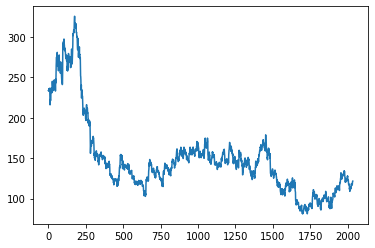

In [11]:
import matplotlib.pyplot as plt
plt.plot(stock_data1)

**Transform the data using MinMax Scaler**

In [12]:
#We have to do this as LSTM is sensitive to the scale of the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
stock_data1 = scaler.fit_transform(np.array(stock_data1).reshape(-1,1))

In [13]:
stock_data1 #array has been transformed into values ranging from 0 to 1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Split dataset into training and testing datasets**

In [14]:
train_size = int(len(stock_data1)*0.65)
test_size = len(stock_data1) - train_size
train_data, test_data = stock_data1[0:train_size,:],stock_data1[train_size:len(stock_data1),:1]


**Preprocess the data**

In [15]:
import numpy as np
def create_dataset(dataset, time_step=1):
  x, y = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    x.append(a)
    y.append(dataset[i+time_step,0])
  return np.array(x),np.array(y)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
#reshaping input for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

**Create the stacked LSTM Model**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
#adding layers
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________



**Fit the model**

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 278ms/step - loss: 0.0251 - val_loss: 0.0049
Epoch 2/100
20/20 [==============================] - 4s 206ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 3/100
20/20 [==============================] - 4s 201ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0014 - val_loss: 8.9307e-04
Epoch 8/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 9/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0016 - v

**Generate Predictions**

In [22]:
import tensorflow as tf #importing the tensorflow library to predict
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

Transform back to original form using reverse scaling

In [23]:
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

Calculate RMSE (Root Mean Square Error)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_prediction)) #for training data

164.49548311033715

In [25]:
math.sqrt(mean_squared_error(y_test,test_prediction)) #for testing data

115.878036514846

Shift predictions for plotting

In [26]:
look_back=100
trainPredictionPlot = np.empty_like(stock_data1) #shifting training predictions
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(train_prediction)+look_back, :] = train_prediction
testPredictionPlot = np.empty_like(stock_data1) #shifting test predictions
testPredictionPlot[:, :] = np.nan
testPredictionPlot[len(train_prediction)+(look_back*2)+1:len(stock_data1)-1, :] = test_prediction

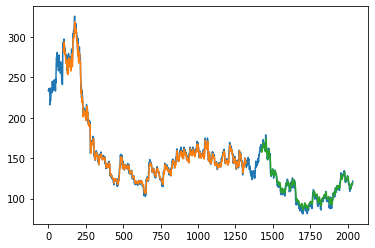

In [27]:
plt.plot(scaler.inverse_transform(stock_data1))
plt.plot(trainPredictionPlot)
plt.plot(testPredictionPlot)
plt.show()

In [28]:
len(test_data)

713

In [29]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


**Prediction for next 30 days**

In [31]:
from numpy import array

final_output=[]
n_steps=100
i=1
while(i<=30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        ypred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,ypred))
        temp_input.extend(ypred[0].tolist())
        temp_input=temp_input[1:]
        final_output.extend(ypred.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        ypred = model.predict(x_input, verbose=0)
        print(ypred[0])
        temp_input.extend(ypred[0].tolist())
        print(len(temp_input))
        final_output.extend(ypred.tolist())
        i=i+1
    

print(final_output)

[0.16423915]
101
2 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

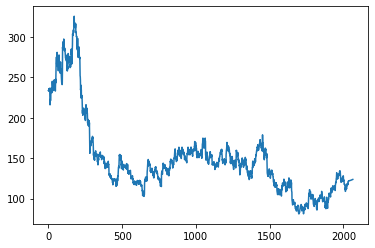

In [32]:
stock_data = stock_data1.tolist()
stock_data.extend(final_output)
stock_data = scaler.inverse_transform(stock_data).tolist()
plt.plot(stock_data)